In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#Imporrting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold,GridSearchCV,train_test_split,StratifiedGroupKFold
from sklearn.metrics import confusion_matrix as cm,accuracy_score as ac,classification_report as report ,roc_curve,roc_auc_score,recall_score,precision_score,f1_score


In [3]:
#Importing Dataset
a=pd.read_csv("/content/drive/MyDrive/Assignment DS/Assignment 6/bank-full.csv",sep = ';')
a

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#Data Exploration
#A Binary Classification Task

In [5]:
print(a.shape)
a.head(10)

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
a.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
a.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
a[a.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [11]:
a[a.duplicated()].shape

(0, 17)

In [13]:
numerical_features=[feature for feature in a.columns if a[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
a[numerical_features].head()

Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [14]:
discrete_feature=[feature for feature in numerical_features if len(a[feature].unique())<25 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))


Discrete Variables Count: 0


In [15]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Continuous Feature Count 7


In [16]:
a.corr()

<ipython-input-16-210c353a220b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#Exploratory Data Analysis


<ipython-input-20-18947072947b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a.corr(),cmap='inferno',annot=True);


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'balance'),
  Text(2.5, 0, 'day'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'campaign'),
  Text(5.5, 0, 'pdays'),
  Text(6.5, 0, 'previous')])

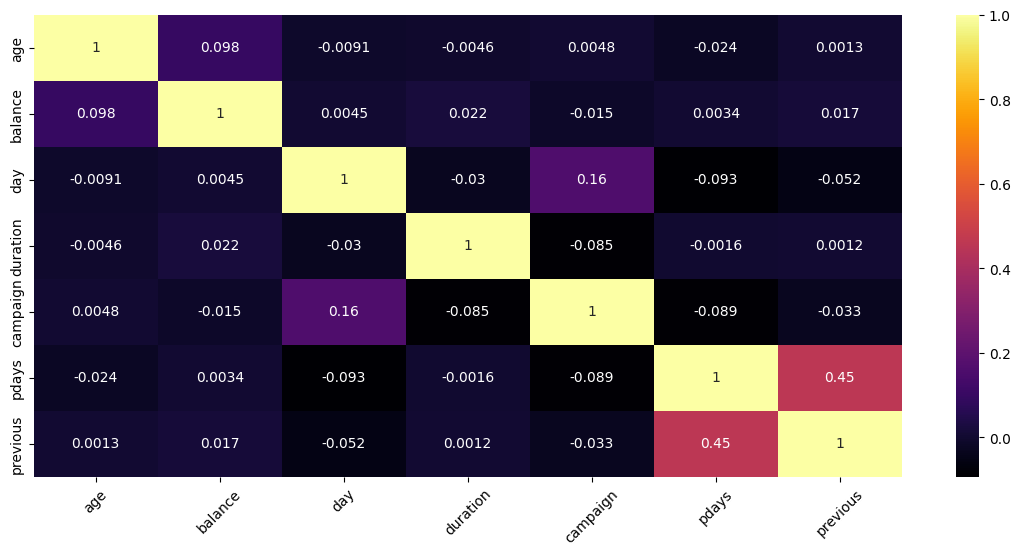

In [20]:
fig=plt.figure(figsize=(14,6))
sns.heatmap(a.corr(),cmap='inferno',annot=True);
plt.xticks(rotation=45)

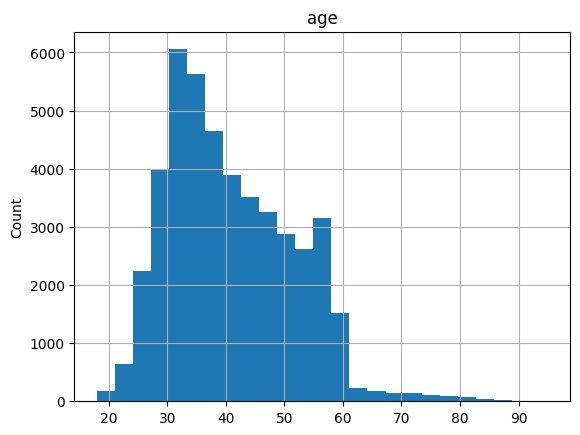

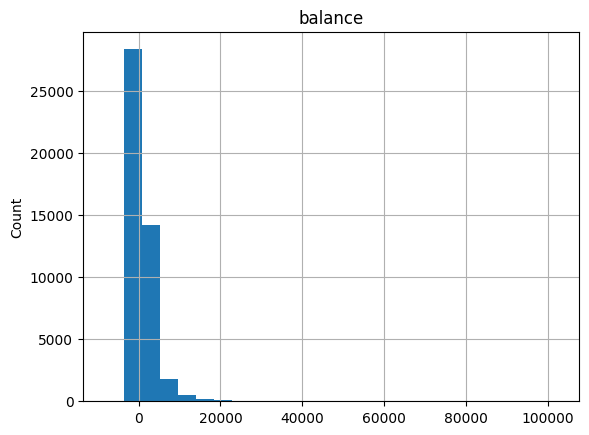

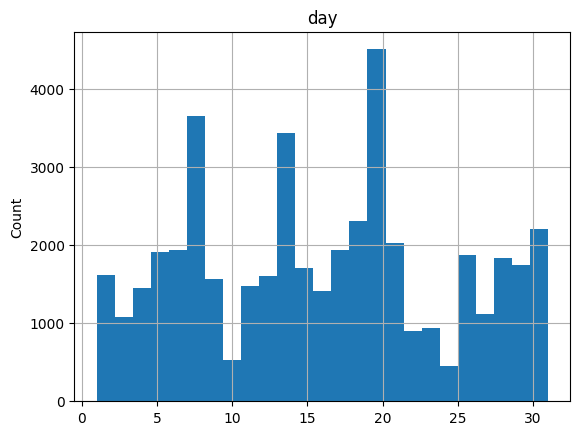

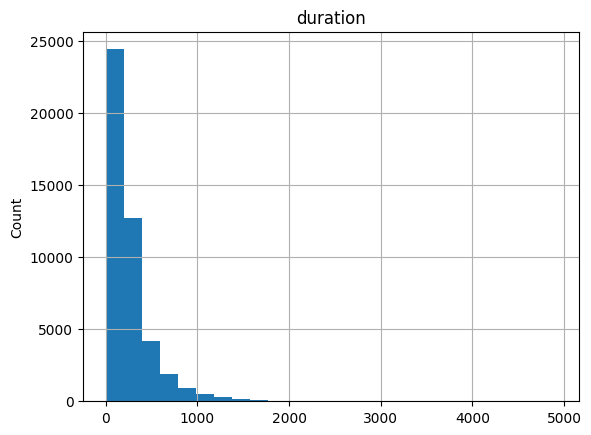

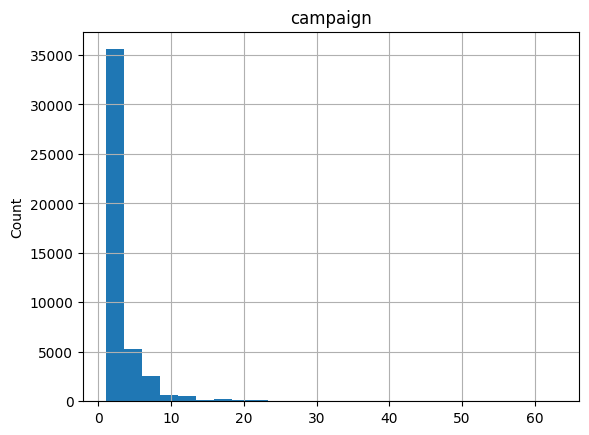

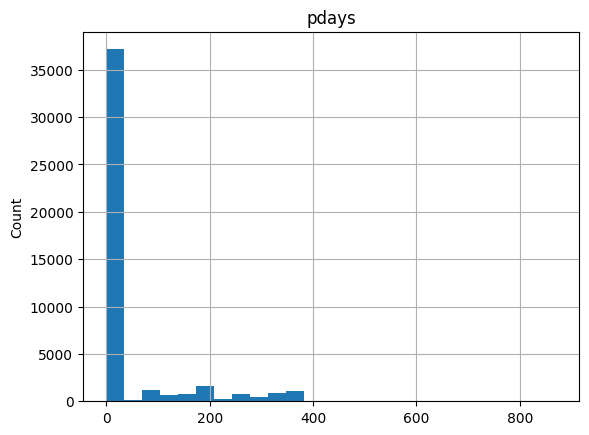

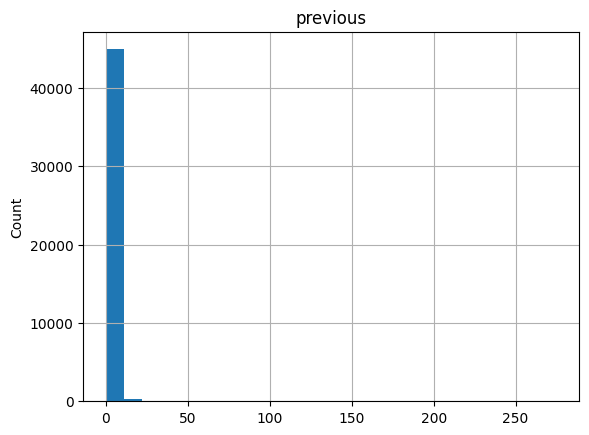

In [21]:
for feature in continuous_feature:
    data=a.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

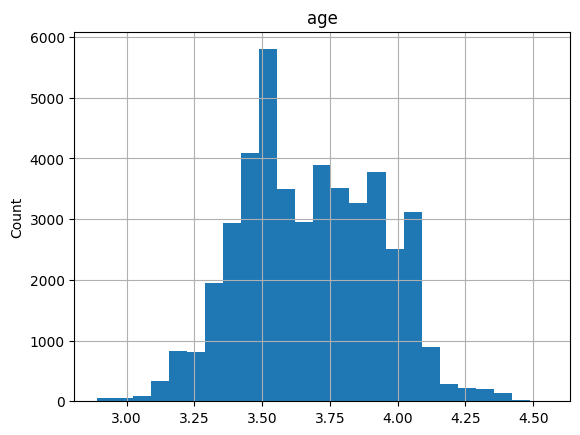

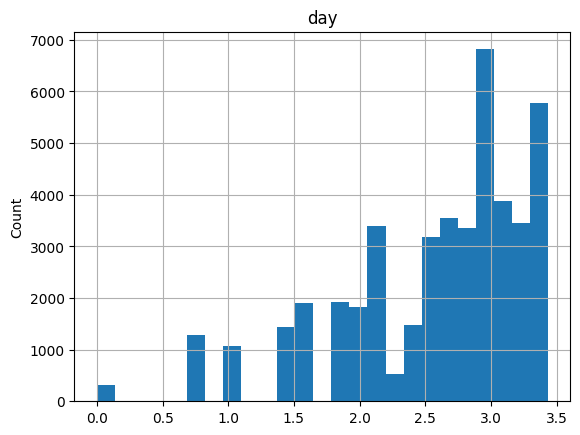

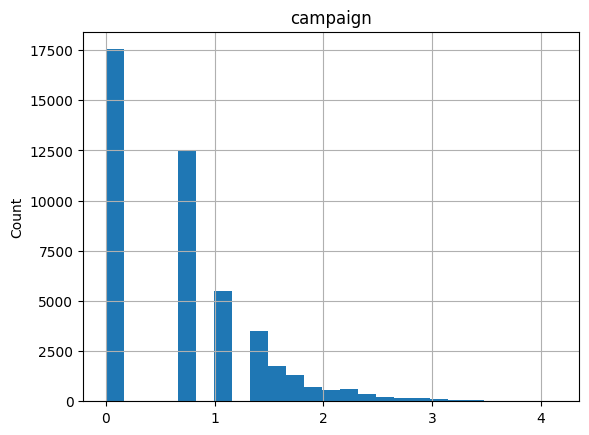

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


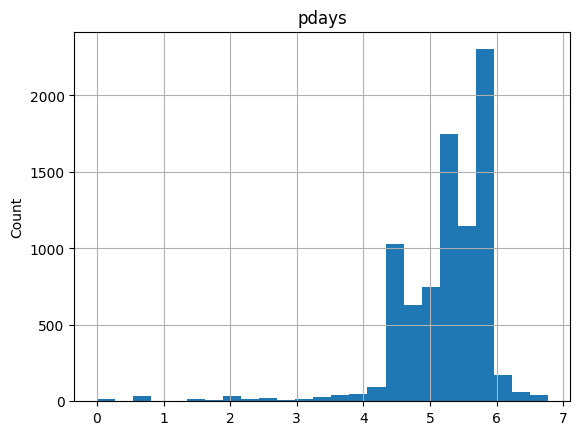

In [24]:
for feature in continuous_feature:
    data=a.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

# Outliers Detection

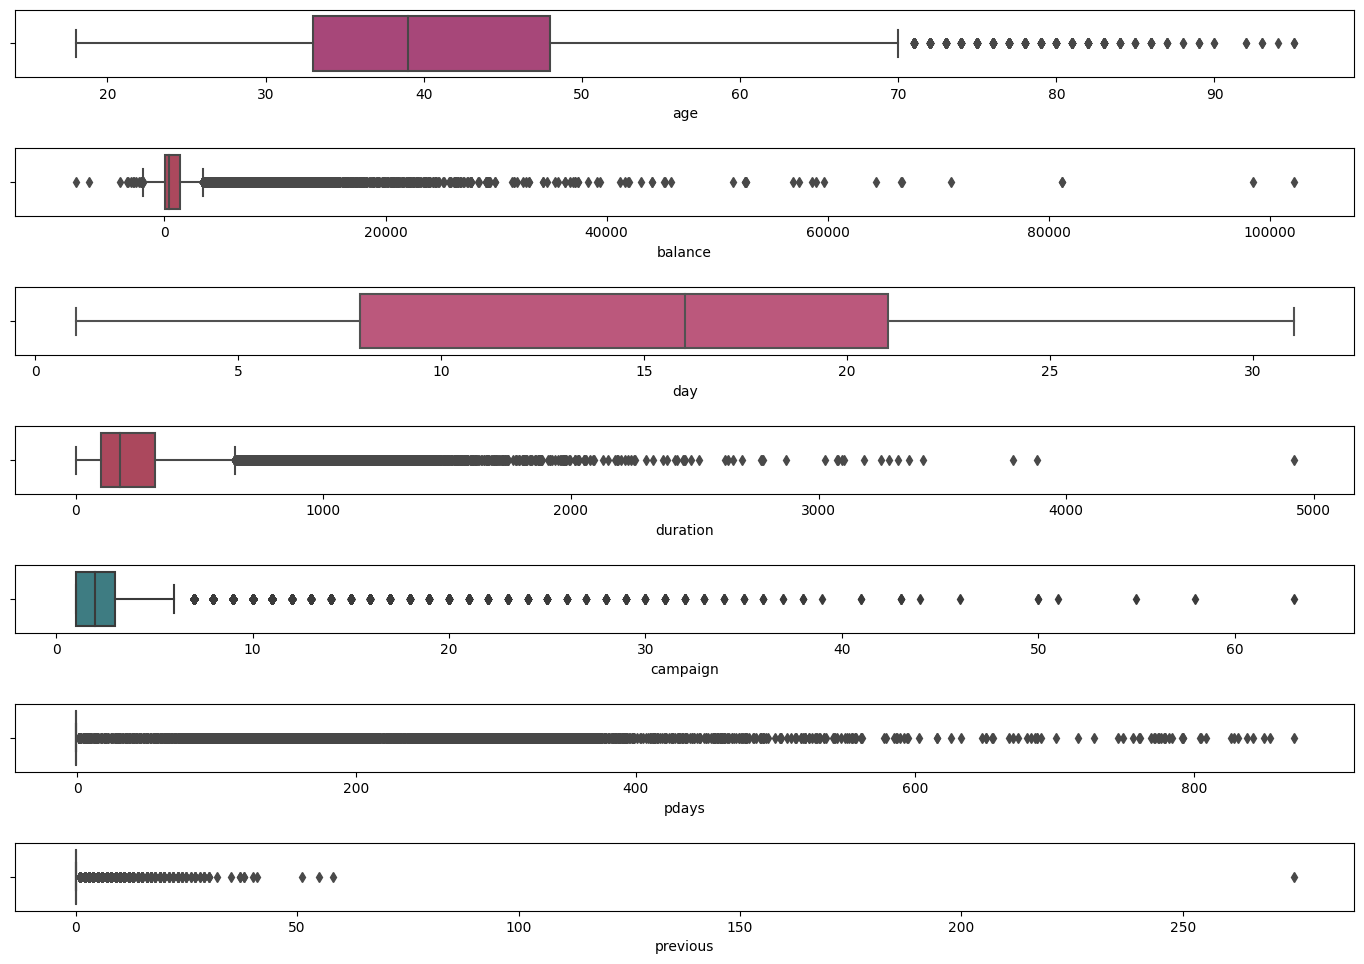

In [30]:
ot=a.copy()
fig, axes=plt.subplots(7,1,figsize=(14,10),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='magma',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='inferno',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='plasma',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='inferno',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='magma',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='inferno',ax=axes[6])
plt.tight_layout(pad=2.0)


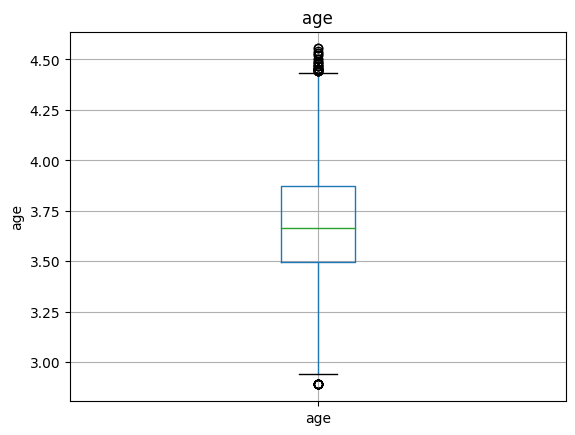

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


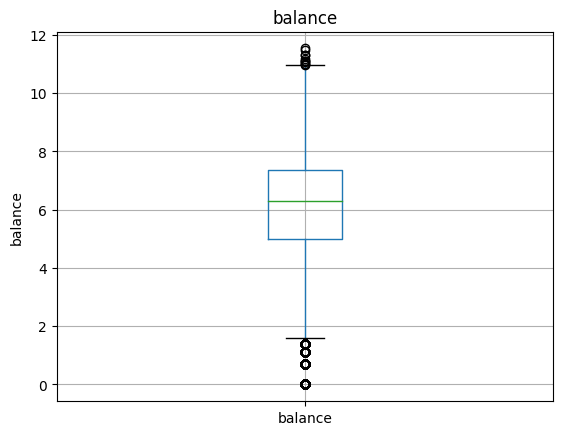

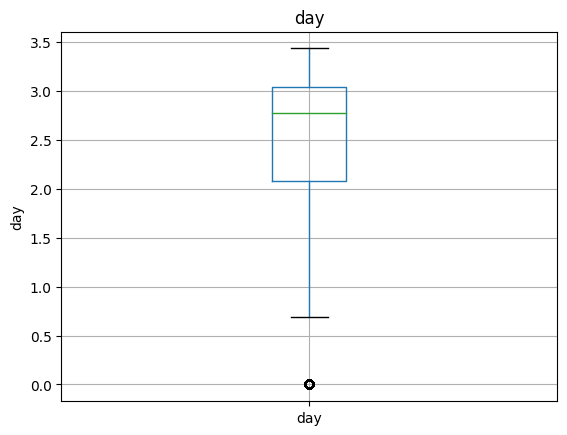

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


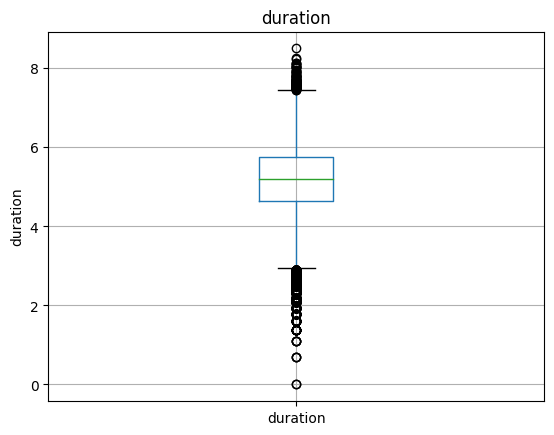

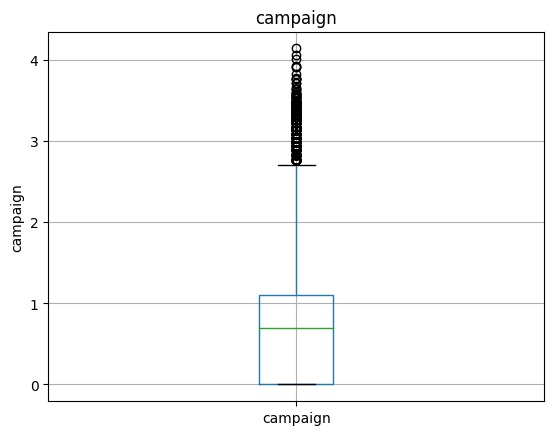

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


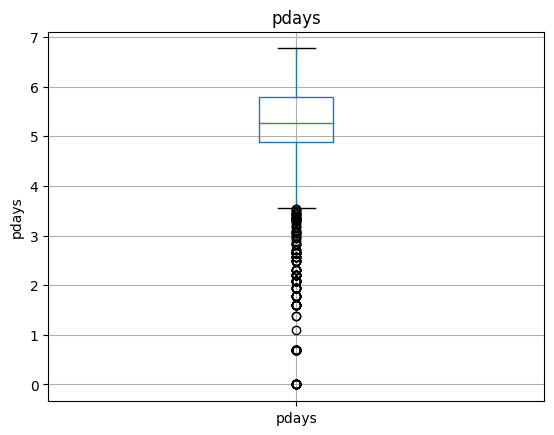

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1273: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


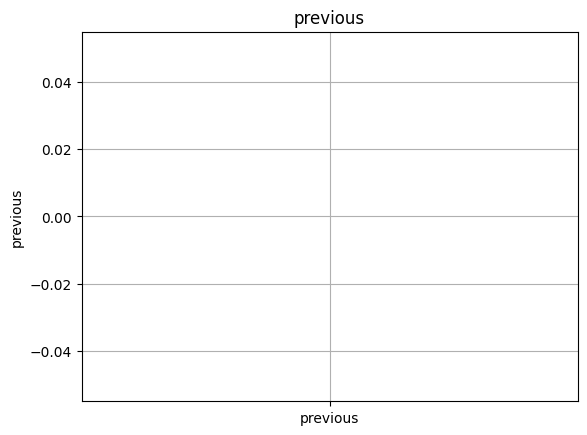

In [31]:
for feature in continuous_feature:
    data=a.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# Visualize the distribution of 'age' and 'balance'

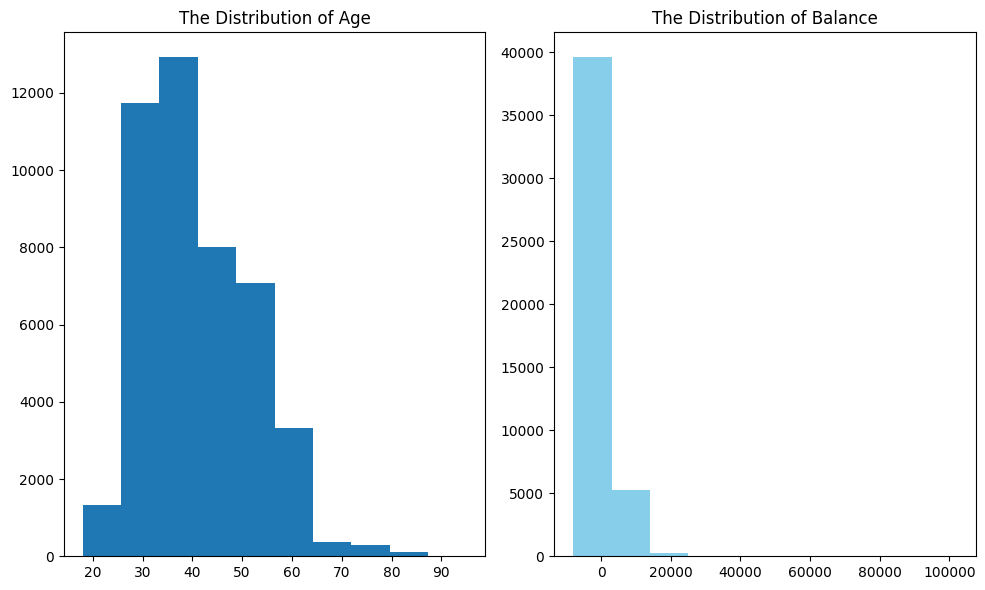

In [32]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1)
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(a['age'])
ra1.set_title('The Distribution of Age')

ra2.hist(a['balance'], color = 'skyblue')
ra2.set_title('The Distribution of Balance')

plt.tight_layout()
plt.show()

In [33]:
a[['age','balance']].describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


# Visualize the relationship between 'duration' & 'campaign'

duration       Axes(0.125,0.11;0.352273x0.77)
campaign    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

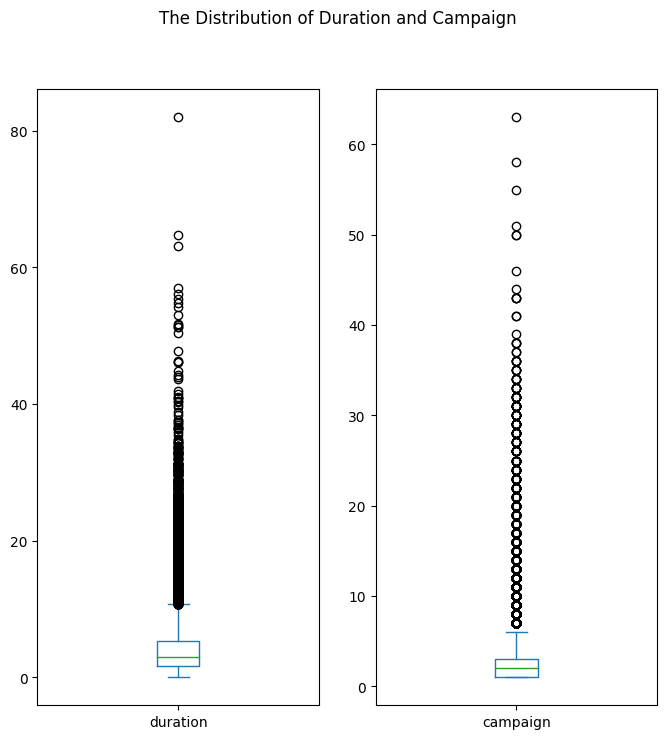

In [34]:
# Change the unit of 'duration' from seconds to minutes
df1 = a.copy()
df1['duration'] = df1['duration'].apply(lambda n:n/60).round(2)
df1[['duration','campaign']].plot(kind = 'box',
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')

In [35]:
df1[['duration','campaign']].describe()

,duration,campaign
count,45211.000000,45211.000000
mean,4.302729,2.763841
std,4.292132,3.098021
min,0.000000,1.000000
25%,1.720000,1.000000
50%,3.000000,2.000000
75%,5.320000,3.000000
max,81.970000,63.000000


In [36]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (a[a['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['balance_no'] = (a[a['y'] == 'no'][['y','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<Axes: title={'center': 'Balance and deposit statistics'}>

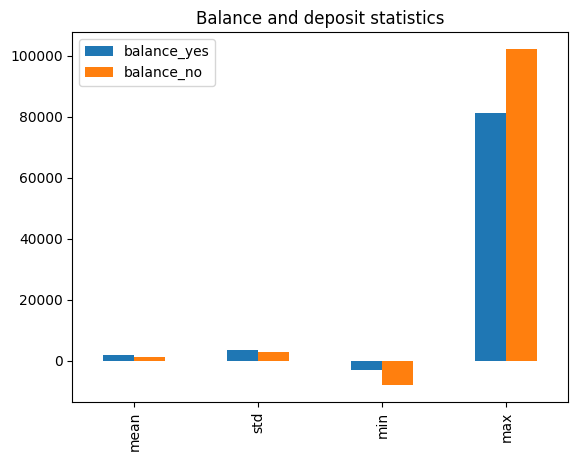

In [41]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [42]:
a_df = pd.DataFrame()
a_df['age_yes'] = (a[a['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (a[a['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<Axes: title={'center': 'Age and deposit statistics'}>

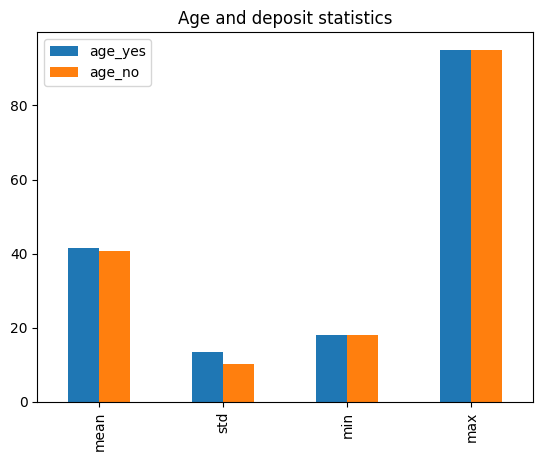

In [43]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [44]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (a[a['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (a[a['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<Axes: title={'center': 'Number of contacts performed during this campaign and deposit statistics'}>

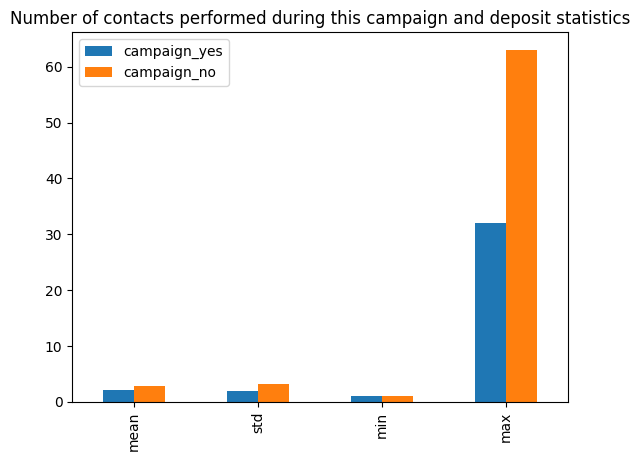

In [45]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')



In [46]:
#number of contacts performed during previous campaign ('previous') and deposit
p_df = pd.DataFrame()
p_df['previous_yes'] = (a[a['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (a[a['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<Axes: title={'center': 'Number of contacts performed during previous campaign and deposit statistics'}>

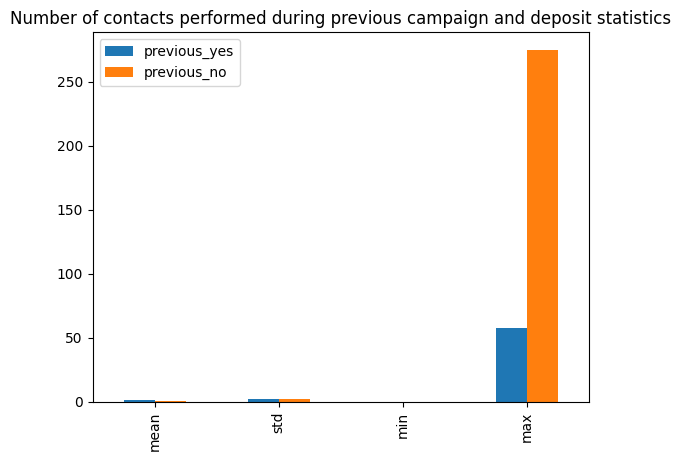

In [47]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')


In [48]:
categorical_features=[feature for feature in a.columns if a[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
a[categorical_features].head()

Number of Categorical Features: 10 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [49]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(a[feature].unique()),feature))

12 number of unique categories in feature named job
3 number of unique categories in feature named marital
4 number of unique categories in feature named education
2 number of unique categories in feature named default
2 number of unique categories in feature named housing
2 number of unique categories in feature named loan
3 number of unique categories in feature named contact
12 number of unique categories in feature named month
4 number of unique categories in feature named poutcome
2 number of unique categories in feature named y


In [50]:
# Decide which categorical variables you want to use in model
for feature in a.columns:
    if a[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(a[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(a[feature].value_counts())
        print()

Feature 'job' has 12 unique categories
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Feature 'marital' has 3 unique categories
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Feature 'education' has 4 unique categories
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Feature 'default' has 2 unique categories
no     44396
yes      815
Name: default, dtype: int64

Feature 'housing' has 2 unique categories
yes    25130
no     20081
Name: housing, dtype: int64

Feature 'loan' has 2 unique categories
no     37967
yes     7244
Name: loan, dtype: int64

Feature 'contact' has 3 unique categories
cellular     29285
unknown      13020
telephone     2906
Name: contac

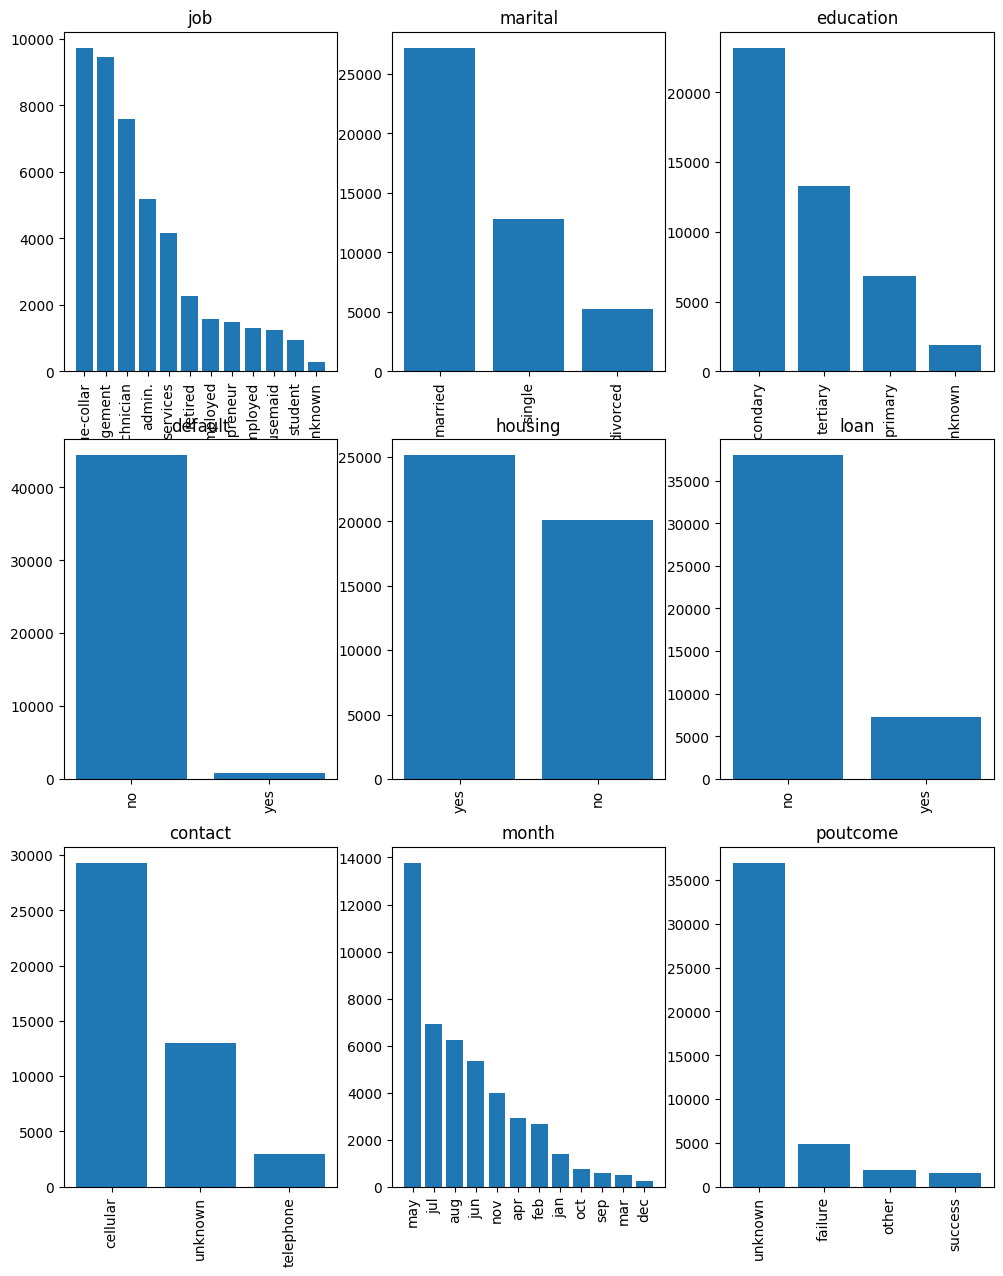

In [56]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(12,15))

counter = 0
for cat_column in columns:
    value_counts = a[cat_column].value_counts()

    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))

    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)

    axs[trace_x, trace_y].set_title(cat_column)

    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    counter += 1

plt.show()



#Bar plot for all categorical variables in the dataset

Text(0.5, 1.0, 'Jobs')

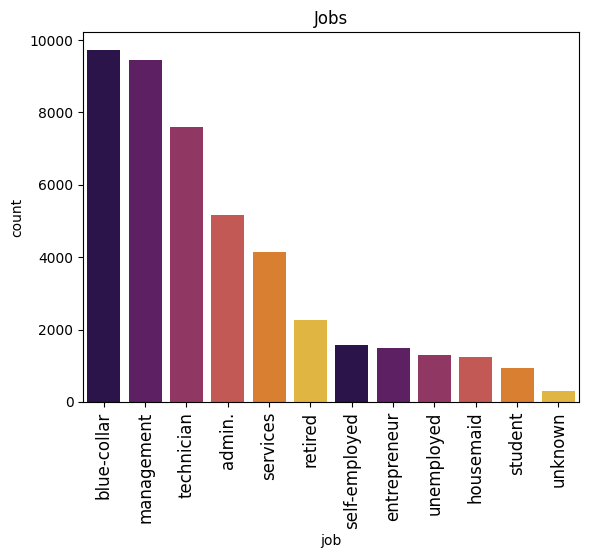

In [59]:
pal = sns.color_palette('inferno')
sns.countplot(x='job', data=a, palette = pal,
              order=a['job'].value_counts().index, );
plt.xticks(rotation = 90,fontsize = 12)
plt.title('Jobs')

Text(0.5, 1.0, 'Marital Status')

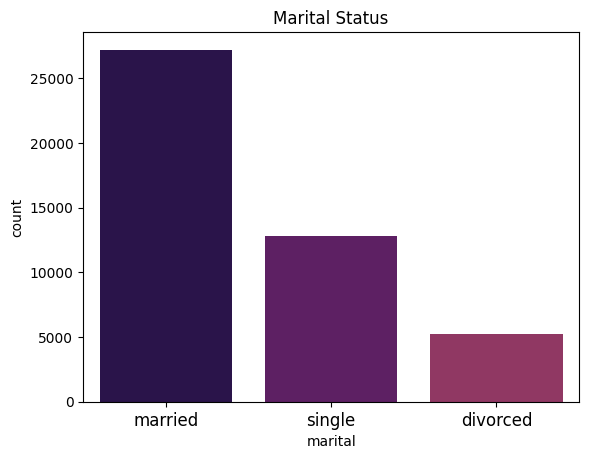

In [60]:
sns.countplot(x='marital', data=a, palette = pal,
              order=a['marital'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

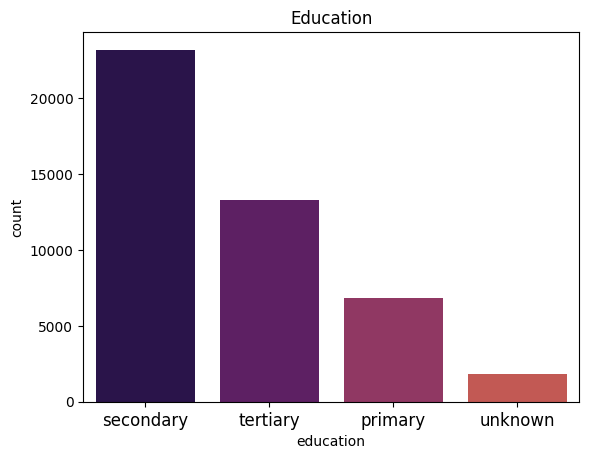

In [61]:
sns.countplot(x='education', data=a, palette = pal,
              order=a['education'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')

Text(0.5, 1.0, 'Housing')

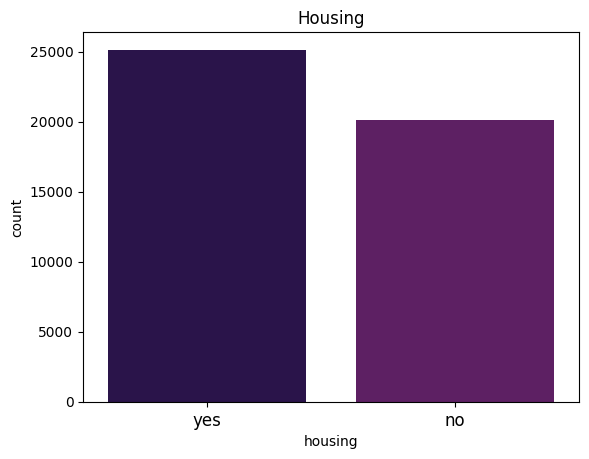

In [62]:
sns.countplot(x='housing', data=a, palette = pal,
              order=a['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Housing')


Text(0.5, 1.0, 'Loan')

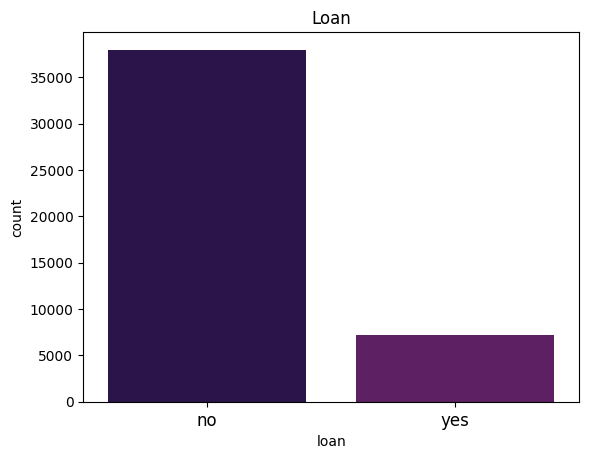

In [63]:
sns.countplot(x='loan', data=a, palette = pal,
              order=a['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Loan')

#Analysis of the response column


In [64]:
countNotermdeposit = len(a[a.y == 'no'])
counthavetermdeposit = len(a[a.y == 'yes'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(a.y))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(a.y))*100)))

Percentage of Customer doesn't have a term deposit: 88.30%
Percentage of Customer have a term deposit: 11.70%


In [65]:
a.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Marital Status')

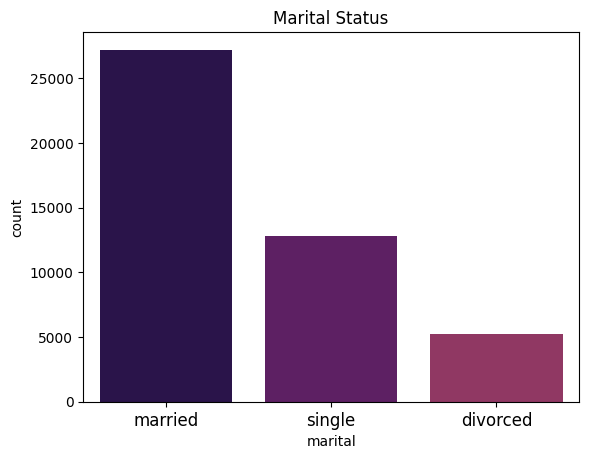

In [66]:
sns.countplot(x='marital', data=a, palette = pal,
              order=a['marital'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status')

Text(0.5, 1.0, 'Education')

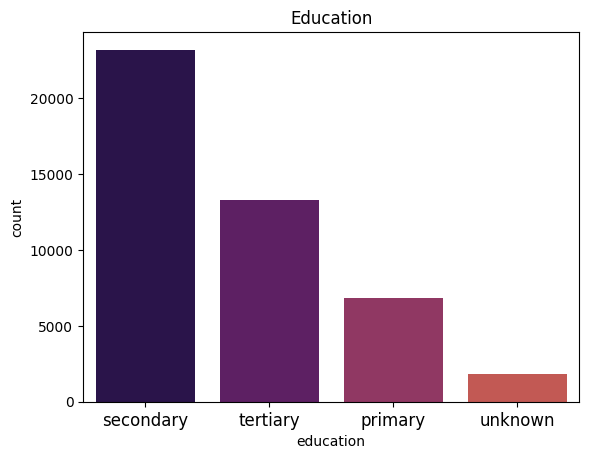

In [67]:
sns.countplot(x='education', data=a, palette = pal,
              order=a['education'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')


Text(0.5, 1.0, 'Education')

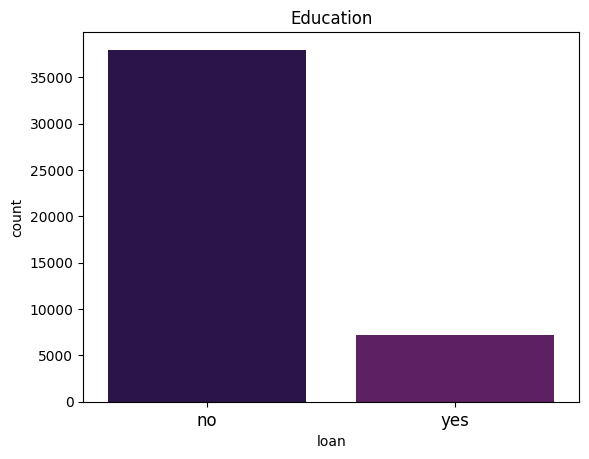

In [68]:
sns.countplot(x='loan', data=a, palette = pal,
              order=a['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Education')


Text(0.5, 1.0, 'housing')

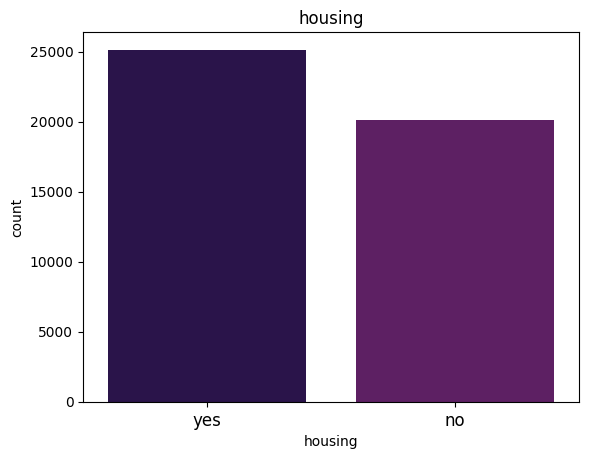

In [69]:
sns.countplot(x='housing', data=a, palette = pal,
              order=a['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('housing')


#Analysis of the response column

In [70]:
countNotermdeposit = len(a[a.y == 'no'])
counthavetermdeposit = len(a[a.y == 'yes'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(a.y))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(a.y))*100)))


Percentage of Customer doesn't have a term deposit: 88.30%
Percentage of Customer have a term deposit: 11.70%


In [71]:
a.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Whether the client has subscribed a term deposit or not ')

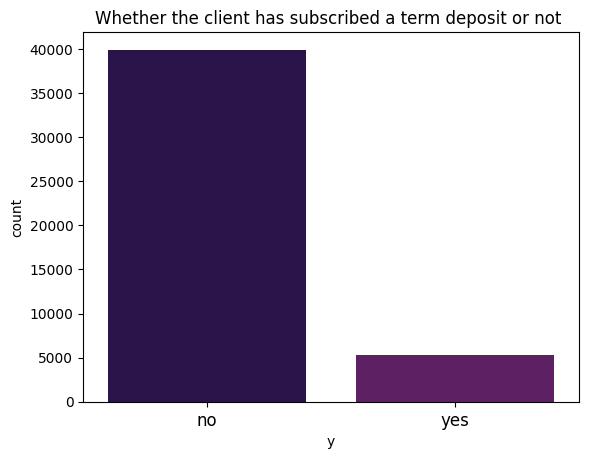

In [72]:
sns.countplot(x='y', data=a, palette = pal,
              order=a['y'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has subscribed a term deposit or not ')

#Data Visualization




<Axes: title={'center': 'Job and deposit'}>

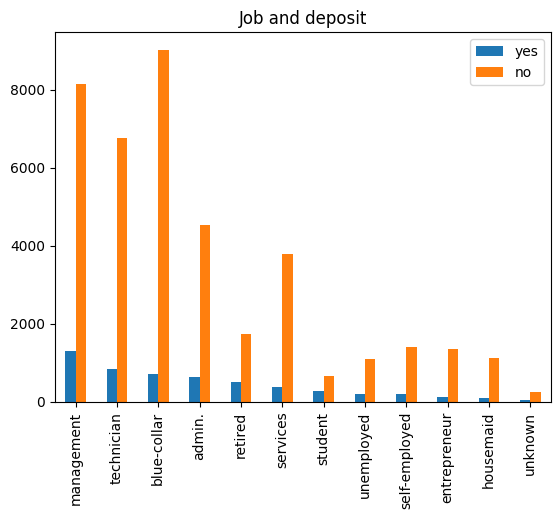

In [73]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = a[a['y'] == 'yes']['job'].value_counts()
j_df['no'] = a[a['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

In [74]:
j_df

,yes,no
management,1301,8157
technician,840,6757
blue-collar,708,9024
admin.,631,4540
retired,516,1748
services,369,3785
student,269,669
unemployed,202,1101
self-employed,187,1392
entrepreneur,123,1364


<Axes: xlabel='y', ylabel='job'>

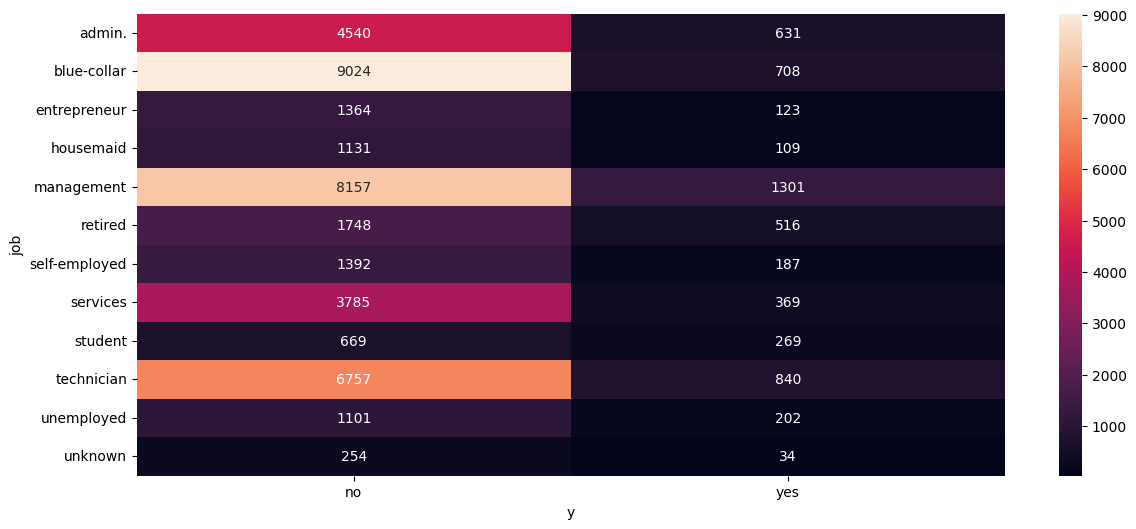

In [76]:
fig= plt.figure(figsize=(14, 6))
sns.heatmap(pd.crosstab(index=a['job'], columns=a['y']), annot=True,
            fmt='g')

<Axes: title={'center': 'Marital status and deposit'}>

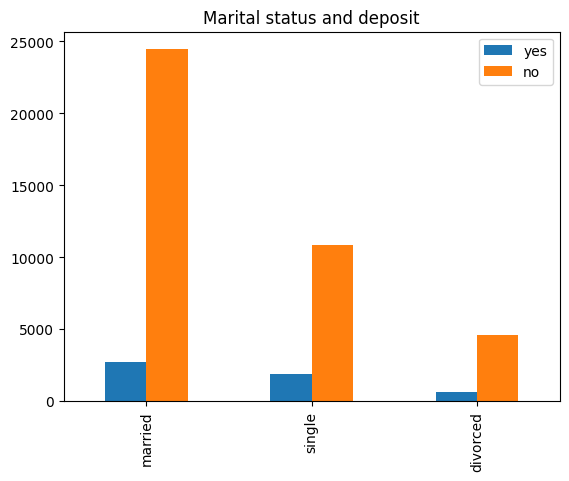

In [77]:
j_df = pd.DataFrame()

j_df['yes'] = a[a['y'] == 'yes']['marital'].value_counts()
j_df['no'] = a[a['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<Axes: xlabel='y', ylabel='marital'>

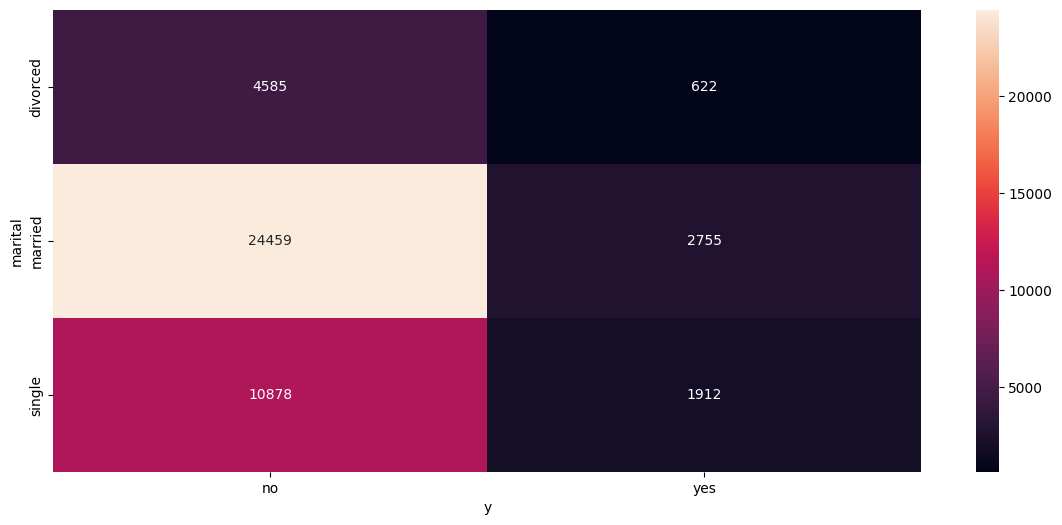

In [79]:
fig= plt.figure(figsize=(14,6))
sns.heatmap(pd.crosstab(index=a['marital'], columns=a['y']), annot=True,
            fmt='g')

<Axes: title={'center': 'Education and deposit'}>

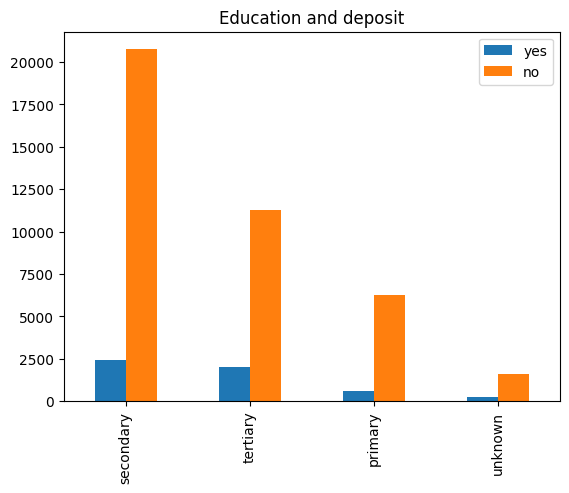

In [80]:
j_df = pd.DataFrame()
j_df['yes'] = a[a['y'] == 'yes']['education'].value_counts()
j_df['no'] = a[a['y'] == 'no']['education'].value_counts()
j_df.plot.bar(title = 'Education and deposit')

<Axes: xlabel='y', ylabel='education'>

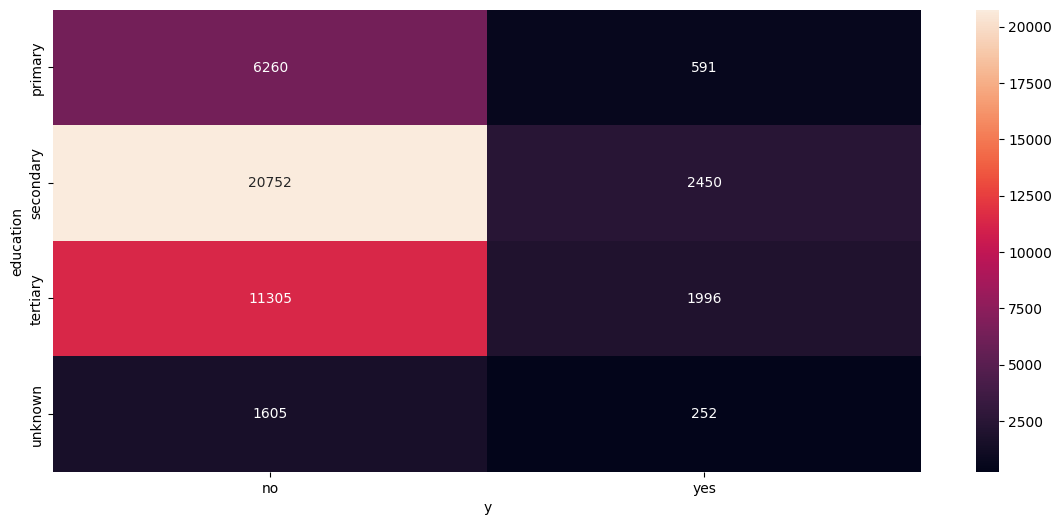

In [81]:
fig= plt.figure(figsize=(14,6))
sns.heatmap(pd.crosstab(index=a['education'], columns=a['y']), annot=True,
            fmt='g')

<Axes: title={'center': 'Type of contact and deposit'}>

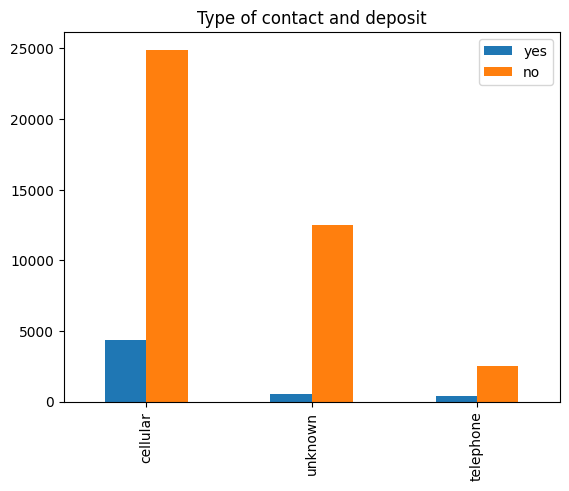

In [83]:
j_df = pd.DataFrame()
j_df['yes'] = a[a['y'] == 'yes']['contact'].value_counts()
j_df['no'] = a[a['y'] == 'no']['contact'].value_counts()
j_df.plot.bar(title = 'Type of contact and deposit')

<Axes: xlabel='y', ylabel='contact'>

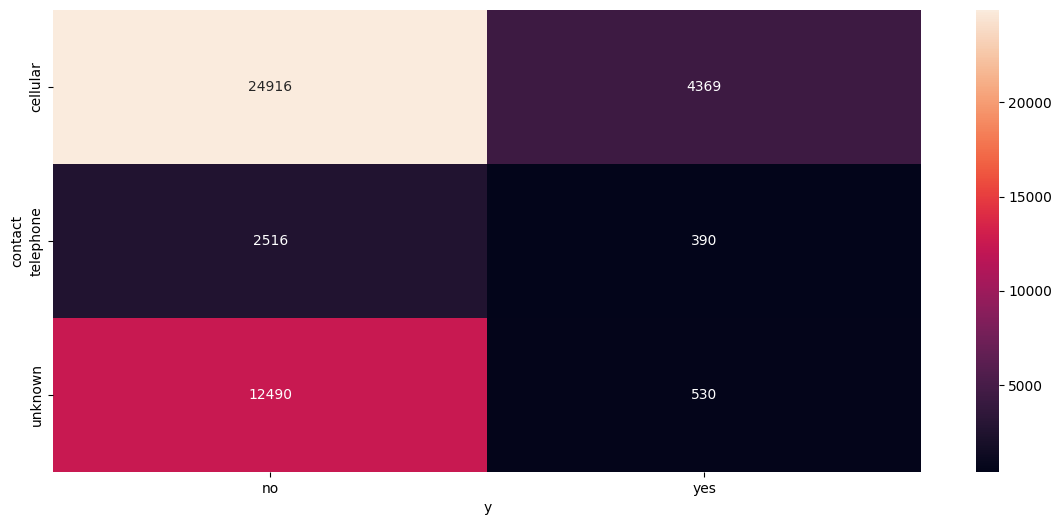

In [85]:
fig= plt.figure(figsize=(14,6))
sns.heatmap(pd.crosstab(index=a['contact'], columns=a['y']), annot=True,
            fmt='g')

<Axes: title={'center': 'Type of possible outcome and deposit'}>

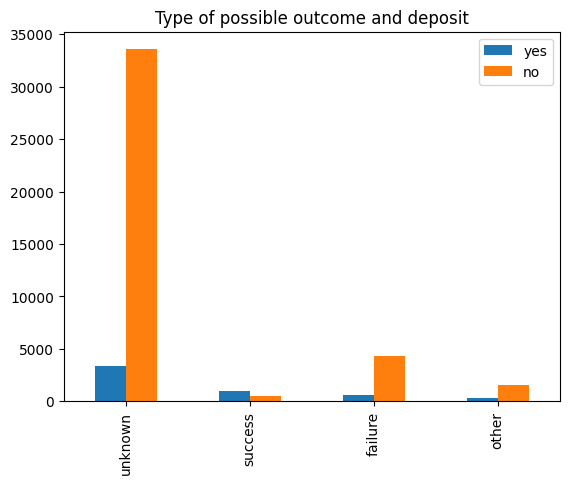

In [86]:
j_df = pd.DataFrame()
j_df['yes'] = a[a['y'] == 'yes']['poutcome'].value_counts()
j_df['no'] = a[a['y'] == 'no']['poutcome'].value_counts()
j_df.plot.bar(title = 'Type of possible outcome and deposit')


<Axes: xlabel='y', ylabel='poutcome'>

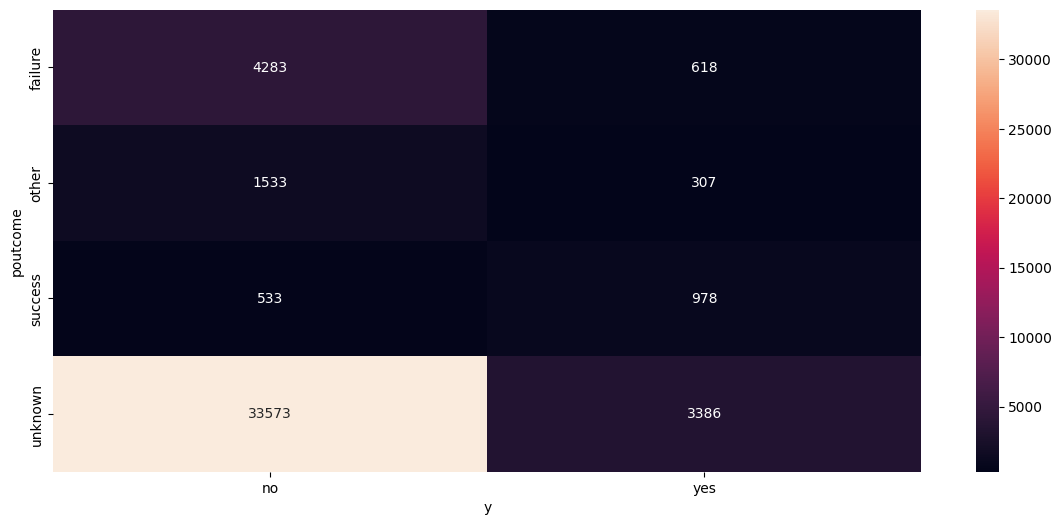

In [88]:
fig= plt.figure(figsize=(14,6))
sns.heatmap(pd.crosstab(index=a['poutcome'], columns=a['y']), annot=True,
            fmt='g')

<Axes: title={'center': 'Loan and deposit'}>

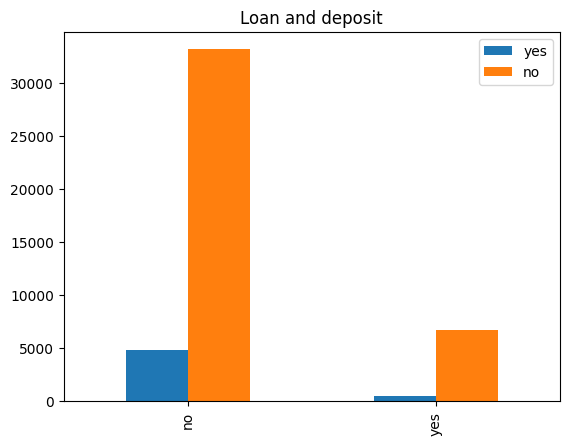

In [89]:
j_df = pd.DataFrame()
j_df['yes'] = a[a['y'] == 'yes']['loan'].value_counts()
j_df['no'] = a[a['y'] == 'no']['loan'].value_counts()
j_df.plot.bar(title = 'Loan and deposit')

<Axes: xlabel='y', ylabel='loan'>

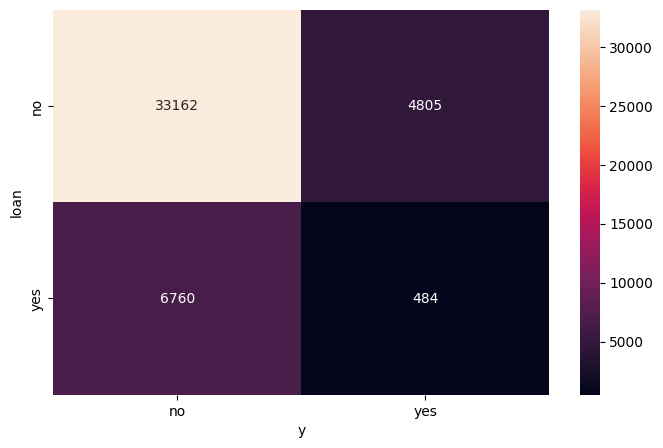

In [92]:
fig= plt.figure(figsize=(8,5))
sns.heatmap(pd.crosstab(index=a['loan'], columns=a['y']), annot=True,
            fmt='g')

#Analyzing Relation

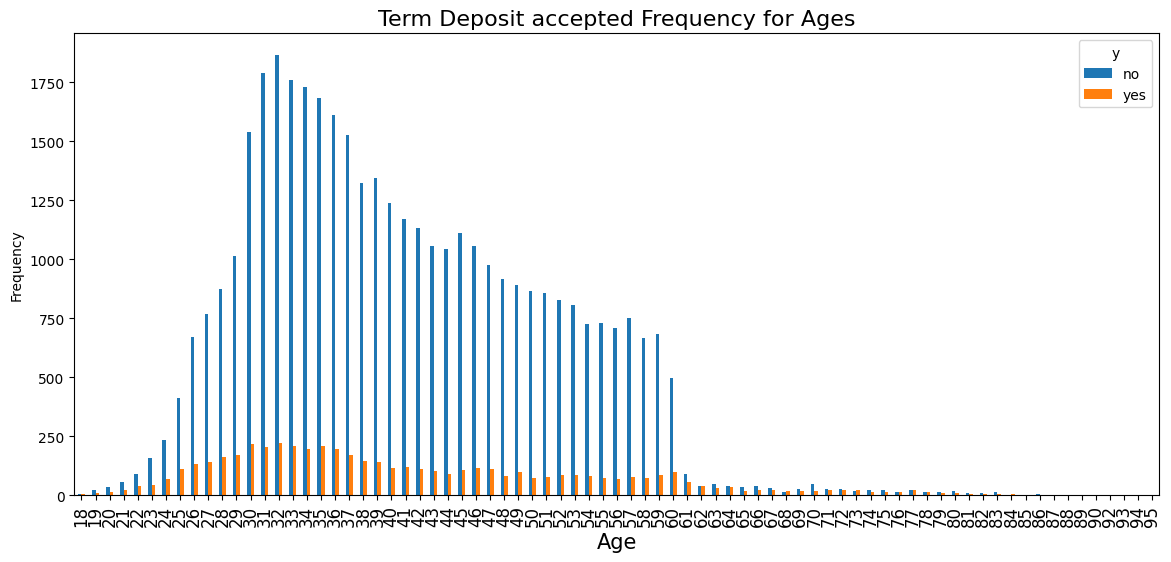

In [94]:
pd.crosstab(a.age,a.y).plot(kind="bar",figsize=(14,6))
plt.title('Term Deposit accepted Frequency for Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

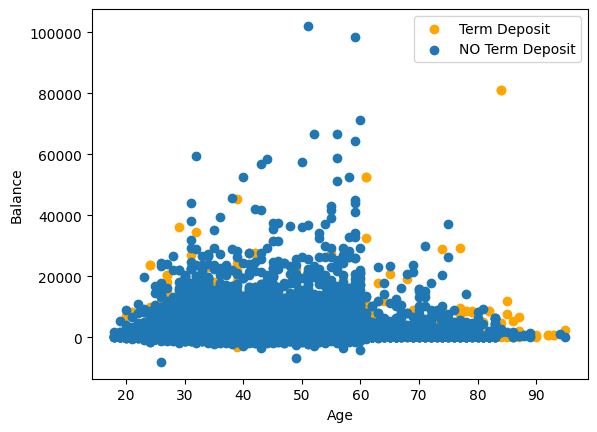

In [99]:
plt.scatter(x=a.age[a.y== 'yes'], y=a.balance[(a.y== 'yes')], c="orange")
plt.scatter(x=a.age[a.y== 'no'], y=a.balance[(a.y== 'no')])
plt.legend(["Term Deposit", "NO Term Deposit"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()


#Visualizeing the subscription and contact rate by age


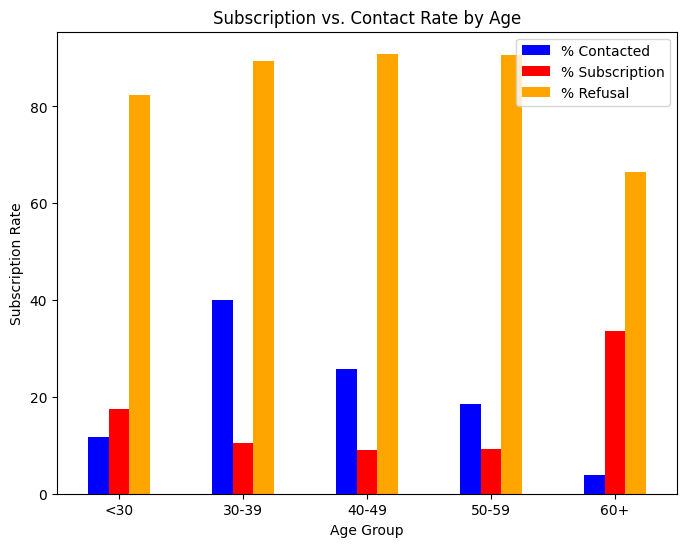

In [103]:
lst = [a]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(a['y'],a['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(a['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age['% Refusal'] = count_age_response_pct['no']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Contacted','% Subscription','% Refusal']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('blue','red','orange'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

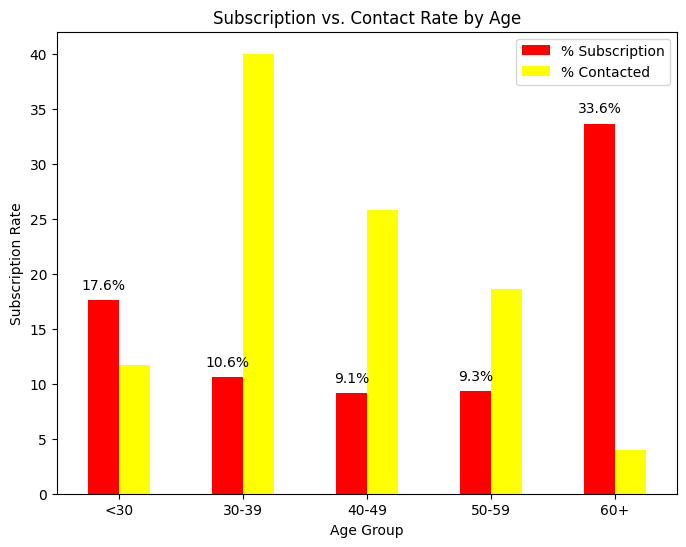

In [104]:
lst = [a]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

count_age_response_pct = pd.crosstab(a['y'],a['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(a['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('red','yellow'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 1,
                      label+'%',
                      ha = 'center',
                      color = 'black')

#Visualize the subscription rate by balance level

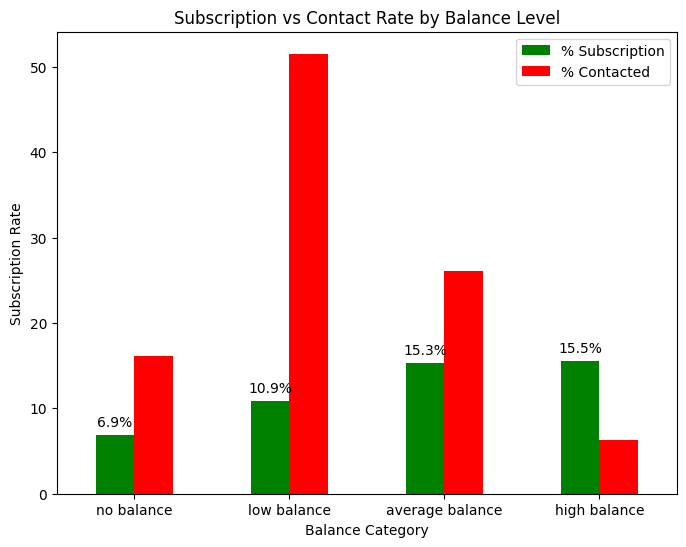

In [105]:
lst = [a]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

count_balance_response_pct = pd.crosstab(a['y'],a['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(a['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2,
                      rec.get_height() + 1,
                      label+'%',
                      ha = 'center',
                      color = 'black')

#Visualize the subscription rate by age and balance

In [106]:
#rename y
df  =a.copy()
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(data, new_column, old_column):
    data[new_column] = data[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data[new_column].value_counts()

convert(df, "response_binary", "response")

0    39922
1     5289
Name: response_binary, dtype: int64

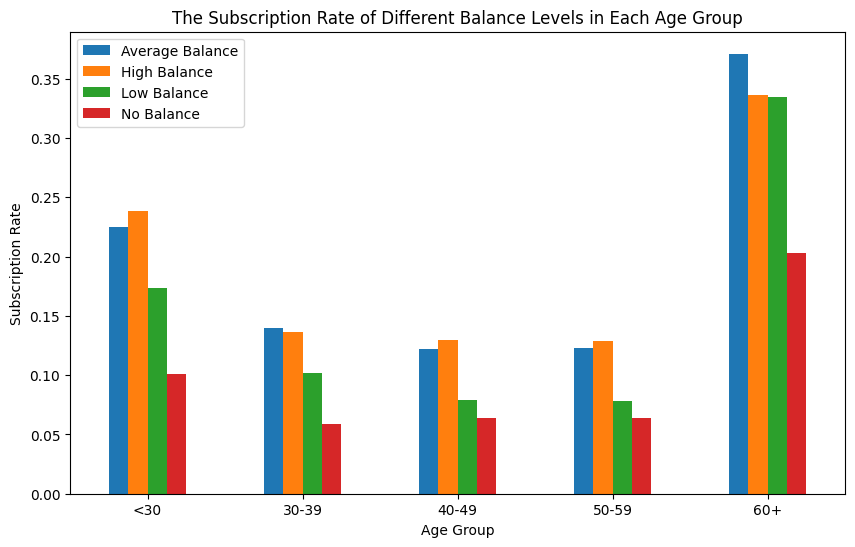

In [107]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']
age_balance1['response_rate'] = age_balance1['response_binary']/ (age_balance1['response'])
age_balance1 = age_balance1.drop(['response_binary','response'],axis =1)

age_balance1 = age_balance1.unstack()
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')

# Set legend
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

#Visualize the subscription rate by job

In [108]:
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


#Relationship between duration & campaign wrt to result

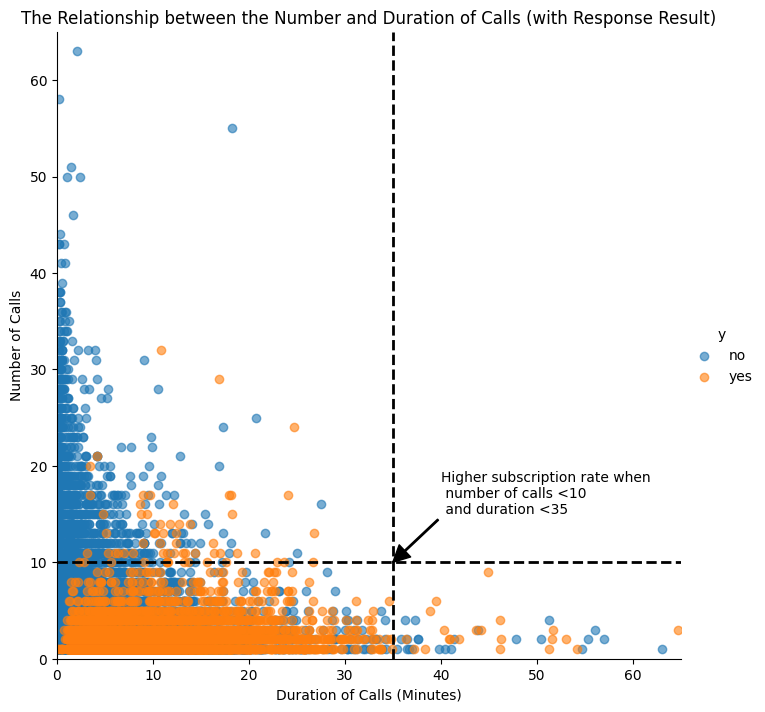

In [109]:
dur_cam = sns.lmplot(x='duration', y='campaign',data = df1,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=10, linewidth=2, color="k", linestyle='--')
plt.axvline(x=35, linewidth=2, color="k", linestyle='--' )
plt.annotate("Higher subscription rate when \n number of calls <10 \n and duration <35",xytext = (40,15),
             arrowprops=dict(color = 'k', width=1),xy=(35,10))
plt.show()

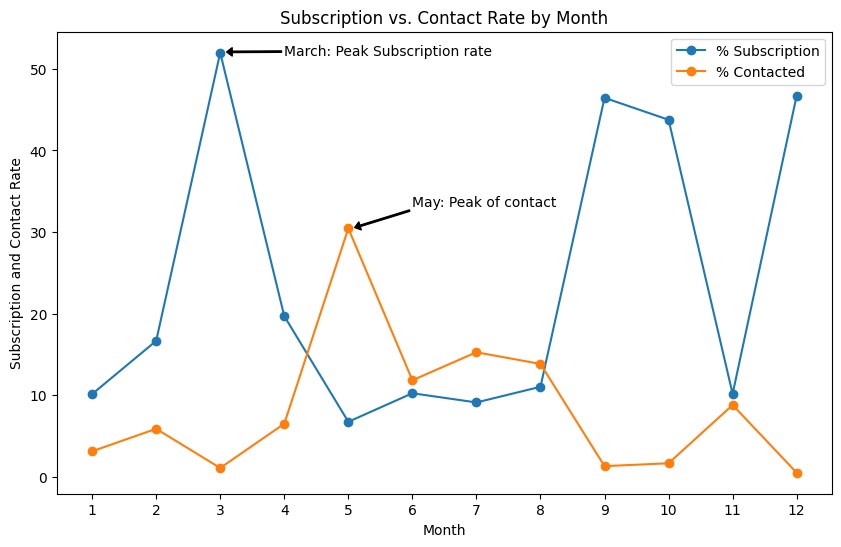

In [110]:
#Change 'month' from words to numbers
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1=df1.replace(order)

count_month_response_pct = pd.crosstab(df1['y'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

#Visualize the subscription rate by Education

In [111]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [112]:
count_education_response_pct = pd.crosstab(df['response'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()
count_education_response_pct

response,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


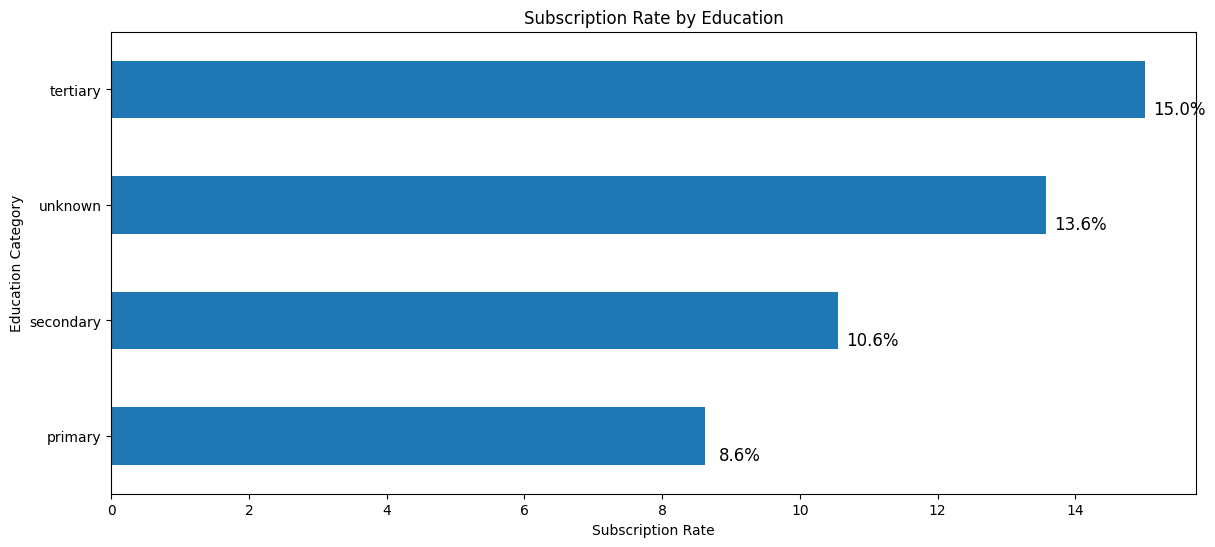

In [113]:
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (14,6))

plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_education.patches,
                      count_education_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5,
                  rec.get_y()+ rec.get_height()-0.5,
                  label+'%',
                  ha = 'center',
                  va='bottom',
                fontsize = 'large')